In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
env_name = 'CustomPendulum-v0'
env_str="pendulum"
figfilenamehead = "fig_policy_evaluation_pendulum_"

num_iter_max=10000
vae_lr=5e-4

seed = 0


In [2]:
env = gym.make(env_name)

random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)


c = 0.21455680991172585
2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

c = 0.16346495489906906
c = 0.19376823391999684
c = 0.2675319002346239
c = 0.1150324556477333
c = 0.15866847592587133
c = 0.2776789914877983
c = 0.02613878991046221
c = 0.2497859536643814
c = 0.2610036444740457
c = 0.23974756926501706
c = 0.23415875288593663
c = 0.19197630639825713
c = 0.28340067511487516
c = 0.12439858199715707
c = 0.232270106830265
c = 0.17053018466059455
c = 0.1852906491227631
c = 0.18508019906242706
c = 0.20454608973104502
c = 0.13110958613980242
c = 0.01806764148878095
c = 0.2011913608854478
c = 0.03867788929645599
c = 0.10911323128278679
c = 0.1315804540386961
c = 0.03061344322440842
c = 0.04839285536549887
c = 0.07598748076193464
c = 0.07332767760048083
c = 0.03311254234929154
c = 0.04145488540458414
c = 0.11061755119828923
c = 0.02913038273791838
c = 0.02882952236818892
c = 0.14059536049431046
c = 0.18145365592351378
c = 0.011756337676296202
c = 0.03605896836395067
c = 0.035618315686273216
c = 0.12427889835440098
c = 0.20774163581100594
c = 0.07961684728183362


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-431.1768)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str
}

vi = vi_base.baseVI(args_init_dict)

In [7]:
vi.get_real_rollout_mdppolicy_data()

0  c = 0.05388110326789044
1  c = 0.2827750799093791
2  c = 0.15731394332316598
3  c = 0.20314234323342722
4  c = 0.15063167421723392
5  c = 0.2724745137703737
6  c = 0.24329451948004602
7  c = 0.03448564489113446
8  c = 0.12566772795552447
9  c = 0.004399746291621242
10  c = 0.031227579640040103
11  c = 0.09497532330898585
12  c = 0.05687215975334853
13  c = 0.23462364322715343
14  c = 0.10108839803214642
15  c = 0.2078441288160539
16  c = 0.04046623426986205
17  c = 0.1695736073349321
18  c = 0.288753688287829
19  c = 0.16412304069194752
20  c = 0.044365065601949014
21  c = 0.23163072784674504
22  c = 0.047219234627092245
23  c = 0.23200469991445097
24  c = 0.21868805929359805
25  c = 0.29750590192818915
26  c = 0.24245242700472103
27  c = 0.2488176727931419
28  c = 0.1037594269002593
29  c = 0.03450842388232006
30  c = 0.2899819933464779
31  c = 0.17124773921915185
32  c = 0.07015124845123409
33  c = 0.0036764408548930925
34  c = 0.07202494056398641
35  c = 0.08517896100238877
36  c

tensor(4.5026)tensor(4.3889)tensor(5.8855)tensor(4.5255)tensor(6.0143)tensor(4.0870)tensor(6.4905)tensor(3.1285)tensor(2.9900)tensor(3.5014)tensor(5.6556)tensor(3.9831)tensor(3.8446)tensor(6.1745)tensor(3.7918)tensor(3.9933)tensor(2.5327)tensor(3.9630)tensor(3.9554)tensor(4.0112)tensor(10.)tensor(3.7765)tensor(5.1849)tensor(4.7844)tensor(5.8485)tensor(6.8739)tensor(7.8424)tensor(7.8593)tensor(4.4555)tensor(6.3247)tensor(4.9241)tensor(4.9643)tensor(8.3011)tensor(9.6224)tensor(5.3728)tensor(3.5952)tensor(5.8878)tensor(7.9708)tensor(5.4334)tensor(5.1188)tensor(6.5418)tensor(6.2711)tensor(7.5900)tensor(4.1992)tensor(3.1242)tensor(4.1338)tensor(7.0936)tensor(8.7707)tensor(10.)tensor(5.7056)tensor(2.8165)tensor(4.0375)tensor(6.5362)tensor(4.8187)tensor(4.4817)tensor(4.5349)tensor(3.2348)tensor(4.8944)tensor(4.3250)tensor(6.7424)tensor(3.5166)tensor(4.2502)tensor(5.8516)tensor(7.0657)tensor(3.7195)tensor(6.7319)tensor(6.3995)tensor(5.7831)tensor(6.2860)tensor(6.3003)tensor(4.4116)tensor(3.745

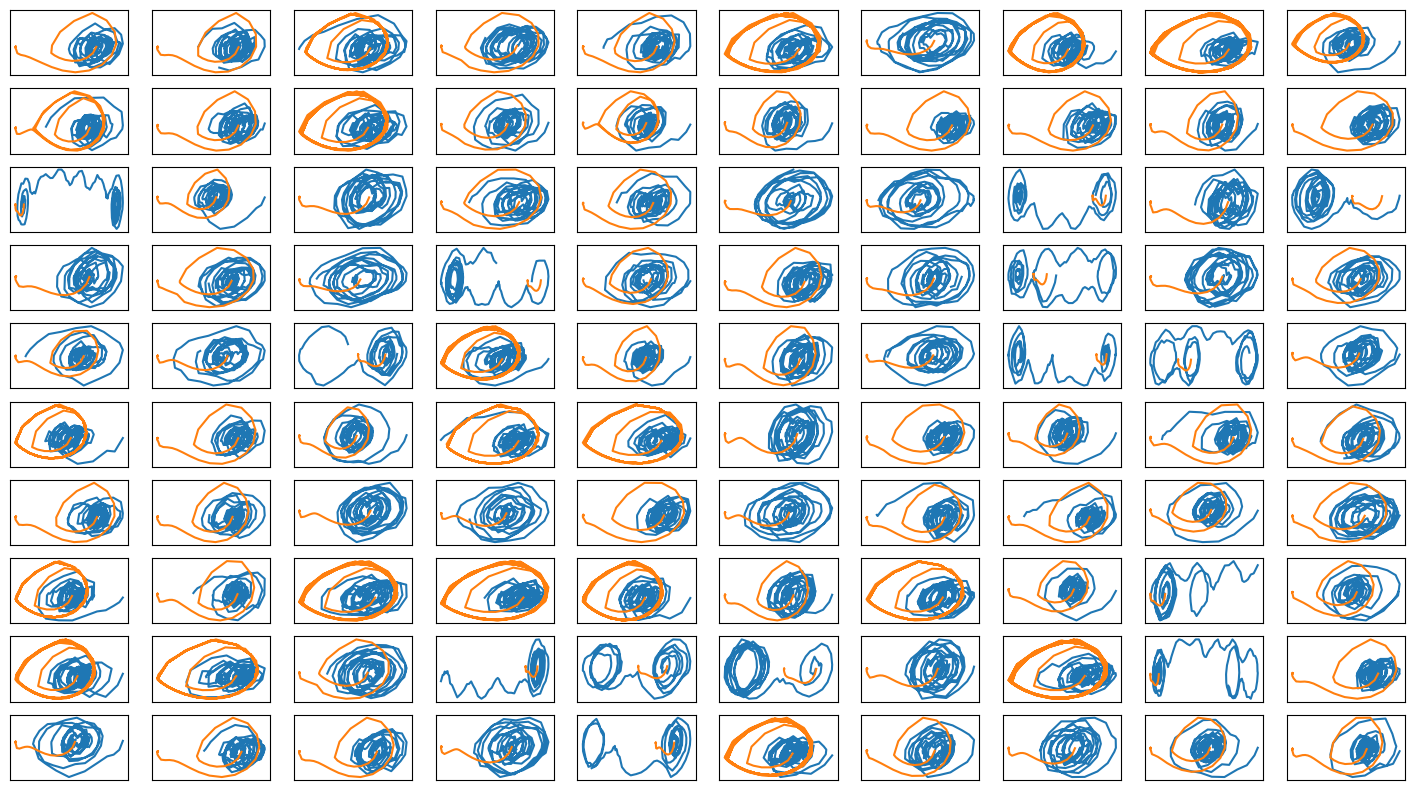

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
print(np.random.randn())
print(torch.randn(1))

-0.025968981297931983
tensor([0.5385])


In [10]:
# -0.025968981297931983
# tensor([0.5385])


train_vae: enc_dec
train: iter 0  trainloss 561.62644  validloss 527.25559±0.00000  bestvalidloss 527.25559  last_update 0
train: iter 1  trainloss 486.84805  validloss 470.44304±0.00000  bestvalidloss 470.44304  last_update 0
train: iter 2  trainloss 432.71968  validloss 426.02874±0.00000  bestvalidloss 426.02874  last_update 0
train: iter 3  trainloss 408.14890  validloss 373.05423±0.00000  bestvalidloss 373.05423  last_update 0
train: iter 4  trainloss 754.09884  validloss 388.59749±0.00000  bestvalidloss 373.05423  last_update 1
train: iter 5  trainloss 380.98190  validloss 359.54483±0.00000  bestvalidloss 359.54483  last_update 0
train: iter 6  trainloss 366.77912  validloss 347.47839±0.00000  bestvalidloss 347.47839  last_update 0
train: iter 7  trainloss 397.69911  validloss 336.01520±0.00000  bestvalidloss 336.01520  last_update 0
train: iter 8  trainloss 363.20698  validloss 335.39278±0.00000  bestvalidloss 335.39278  last_update 0
train: iter 9  trainloss 354.58260  validloss

train: iter 77  trainloss -529.46682  validloss -698.65906±0.00000  bestvalidloss -764.15242  last_update 1
train: iter 78  trainloss -503.51077  validloss -690.59766±0.00000  bestvalidloss -764.15242  last_update 2
train: iter 79  trainloss -529.54615  validloss -713.39585±0.00000  bestvalidloss -764.15242  last_update 3
train: iter 80  trainloss -532.72222  validloss -692.68535±0.00000  bestvalidloss -764.15242  last_update 4
train: iter 81  trainloss -553.53759  validloss -768.96592±0.00000  bestvalidloss -768.96592  last_update 0
train: iter 82  trainloss -555.68536  validloss -768.18323±0.00000  bestvalidloss -768.96592  last_update 1
train: iter 83  trainloss -551.11869  validloss -792.50142±0.00000  bestvalidloss -792.50142  last_update 0
train: iter 84  trainloss -533.35209  validloss -770.51177±0.00000  bestvalidloss -792.50142  last_update 1
train: iter 85  trainloss -557.17351  validloss -715.96919±0.00000  bestvalidloss -792.50142  last_update 2
train: iter 86  trainloss -5

train: iter 153  trainloss -581.52554  validloss -822.83457±0.00000  bestvalidloss -841.94966  last_update 3
train: iter 154  trainloss -630.56368  validloss -794.68301±0.00000  bestvalidloss -841.94966  last_update 4
train: iter 155  trainloss -630.03115  validloss -832.96196±0.00000  bestvalidloss -841.94966  last_update 5
train: iter 156  trainloss -630.95308  validloss -782.22961±0.00000  bestvalidloss -841.94966  last_update 6
train: iter 157  trainloss -592.68452  validloss -836.43219±0.00000  bestvalidloss -841.94966  last_update 7
train: iter 158  trainloss -463.39677  validloss -796.48664±0.00000  bestvalidloss -841.94966  last_update 8
train: iter 159  trainloss -534.89647  validloss -459.91064±0.00000  bestvalidloss -841.94966  last_update 9
train: iter 160  trainloss -613.97309  validloss -779.27513±0.00000  bestvalidloss -841.94966  last_update 10
train: iter 161  trainloss -620.00747  validloss -810.14480±0.00000  bestvalidloss -841.94966  last_update 11
train: iter 162  

train: iter 228  trainloss -649.37577  validloss -857.00469±0.00000  bestvalidloss -865.94327  last_update 12
train: iter 229  trainloss -633.59264  validloss -836.82662±0.00000  bestvalidloss -865.94327  last_update 13
train: iter 230  trainloss -652.21407  validloss -835.58576±0.00000  bestvalidloss -865.94327  last_update 14
train: iter 231  trainloss -645.85081  validloss -844.98334±0.00000  bestvalidloss -865.94327  last_update 15
train: iter 232  trainloss -652.64014  validloss -858.59659±0.00000  bestvalidloss -865.94327  last_update 16
train: iter 233  trainloss -646.30637  validloss -841.25328±0.00000  bestvalidloss -865.94327  last_update 17
train: iter 234  trainloss -641.56138  validloss -828.17953±0.00000  bestvalidloss -865.94327  last_update 18
train: iter 235  trainloss -650.60189  validloss -809.96809±0.00000  bestvalidloss -865.94327  last_update 19
train: iter 236  trainloss -652.63840  validloss -856.98151±0.00000  bestvalidloss -865.94327  last_update 20
train: ite

train: iter 303  trainloss -653.79725  validloss -845.74147±0.00000  bestvalidloss -877.12610  last_update 34
train: iter 304  trainloss -670.58713  validloss -853.52531±0.00000  bestvalidloss -877.12610  last_update 35
train: iter 305  trainloss -657.20137  validloss -859.30666±0.00000  bestvalidloss -877.12610  last_update 36
train: iter 306  trainloss -663.30754  validloss -851.82372±0.00000  bestvalidloss -877.12610  last_update 37
train: iter 307  trainloss -667.33196  validloss -862.70176±0.00000  bestvalidloss -877.12610  last_update 38
train: iter 308  trainloss -674.86268  validloss -839.03158±0.00000  bestvalidloss -877.12610  last_update 39
train: iter 309  trainloss -666.34227  validloss -875.32914±0.00000  bestvalidloss -877.12610  last_update 40
train: iter 310  trainloss -626.49362  validloss -869.90568±0.00000  bestvalidloss -877.12610  last_update 41
train: iter 311  trainloss -658.05372  validloss -865.20393±0.00000  bestvalidloss -877.12610  last_update 42
train: ite

train: iter 378  trainloss -651.95998  validloss -300.10409±0.00000  bestvalidloss -890.64782  last_update 36
train: iter 379  trainloss -672.72318  validloss -817.03462±0.00000  bestvalidloss -890.64782  last_update 37
train: iter 380  trainloss -685.44854  validloss -841.76716±0.00000  bestvalidloss -890.64782  last_update 38
train: iter 381  trainloss -683.61728  validloss -876.68190±0.00000  bestvalidloss -890.64782  last_update 39
train: iter 382  trainloss -653.06341  validloss -857.50526±0.00000  bestvalidloss -890.64782  last_update 40
train: iter 383  trainloss -668.36172  validloss -723.00528±0.00000  bestvalidloss -890.64782  last_update 41
train: iter 384  trainloss -687.77427  validloss -854.48372±0.00000  bestvalidloss -890.64782  last_update 42
train: iter 385  trainloss -690.63187  validloss -853.67164±0.00000  bestvalidloss -890.64782  last_update 43
train: iter 386  trainloss -677.62108  validloss -884.74781±0.00000  bestvalidloss -890.64782  last_update 44
train: ite

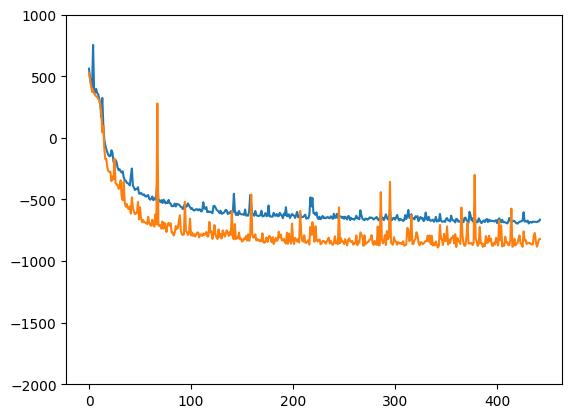

train_vae: enc
train: iter 0  trainloss -639.28151  validloss -885.91652±0.00000  bestvalidloss -885.91652  last_update 0
train: iter 1  trainloss -670.13017  validloss -847.05357±0.00000  bestvalidloss -885.91652  last_update 1
train: iter 2  trainloss -651.62993  validloss -884.90181±0.00000  bestvalidloss -885.91652  last_update 2
train: iter 3  trainloss -678.62357  validloss -892.21054±0.00000  bestvalidloss -892.21054  last_update 0
train: iter 4  trainloss -650.91646  validloss -887.21091±0.00000  bestvalidloss -892.21054  last_update 1
train: iter 5  trainloss -654.24296  validloss -885.54924±0.00000  bestvalidloss -892.21054  last_update 2
train: iter 6  trainloss -672.21832  validloss -838.10287±0.00000  bestvalidloss -892.21054  last_update 3
train: iter 7  trainloss -670.13561  validloss -893.86710±0.00000  bestvalidloss -893.86710  last_update 0
train: iter 8  trainloss -676.25792  validloss -892.47552±0.00000  bestvalidloss -893.86710  last_update 1
train: iter 9  trainlo

train: iter 76  trainloss -667.92384  validloss -876.77686±0.00000  bestvalidloss -895.77704  last_update 48
train: iter 77  trainloss -660.11447  validloss -821.37908±0.00000  bestvalidloss -895.77704  last_update 49
train: iter 78  trainloss -666.88359  validloss -893.02587±0.00000  bestvalidloss -895.77704  last_update 50
train: iter 79  trainloss -658.92967  validloss -893.17216±0.00000  bestvalidloss -895.77704  last_update 51
train: iter 80  trainloss -674.32212  validloss -888.16337±0.00000  bestvalidloss -895.77704  last_update 52
train: iter 81  trainloss -643.48122  validloss -852.31024±0.00000  bestvalidloss -895.77704  last_update 53
train: iter 82  trainloss -666.59278  validloss -893.11881±0.00000  bestvalidloss -895.77704  last_update 54
train: iter 83  trainloss -652.48544  validloss -892.85650±0.00000  bestvalidloss -895.77704  last_update 55
train: iter 84  trainloss -670.77723  validloss -872.50684±0.00000  bestvalidloss -895.77704  last_update 56
train: iter 85  tra

train: iter 22  trainloss -682.40132  validloss -865.94413±0.00000  bestvalidloss -900.57371  last_update 1
train: iter 23  trainloss -685.78766  validloss -850.54401±0.00000  bestvalidloss -900.57371  last_update 2
train: iter 24  trainloss -677.59152  validloss -821.96833±0.00000  bestvalidloss -900.57371  last_update 3
train: iter 25  trainloss -682.08204  validloss -867.74934±0.00000  bestvalidloss -900.57371  last_update 4
train: iter 26  trainloss -663.09285  validloss -854.01450±0.00000  bestvalidloss -900.57371  last_update 5
train: iter 27  trainloss -693.77674  validloss -877.53123±0.00000  bestvalidloss -900.57371  last_update 6
train: iter 28  trainloss -670.87333  validloss -858.52001±0.00000  bestvalidloss -900.57371  last_update 7
train: iter 29  trainloss -688.56942  validloss -855.79766±0.00000  bestvalidloss -900.57371  last_update 8
train: iter 30  trainloss -694.53057  validloss -855.42463±0.00000  bestvalidloss -900.57371  last_update 9
train: iter 31  trainloss -6

train: iter 100  trainloss -704.58195  validloss -836.94429±0.00000  bestvalidloss -900.98002  last_update 11
train: iter 101  trainloss -709.19679  validloss -858.72031±0.00000  bestvalidloss -900.98002  last_update 12
train: iter 102  trainloss -700.14236  validloss -866.10121±0.00000  bestvalidloss -900.98002  last_update 13
train: iter 103  trainloss -702.27599  validloss -893.88213±0.00000  bestvalidloss -900.98002  last_update 14
train: iter 104  trainloss -698.88559  validloss -896.45001±0.00000  bestvalidloss -900.98002  last_update 15
train: iter 105  trainloss -701.94435  validloss -896.29747±0.00000  bestvalidloss -900.98002  last_update 16
train: iter 106  trainloss -697.06453  validloss -869.66277±0.00000  bestvalidloss -900.98002  last_update 17
train: iter 107  trainloss -695.90632  validloss -877.58058±0.00000  bestvalidloss -900.98002  last_update 18
train: iter 108  trainloss -703.28422  validloss -852.84793±0.00000  bestvalidloss -900.98002  last_update 19
train: ite

train: iter 177  trainloss -716.48992  validloss -868.93422±0.00000  bestvalidloss -910.04280  last_update 35
train: iter 178  trainloss -709.18210  validloss -888.08550±0.00000  bestvalidloss -910.04280  last_update 36
train: iter 179  trainloss -690.19545  validloss -863.23995±0.00000  bestvalidloss -910.04280  last_update 37
train: iter 180  trainloss -696.99025  validloss -858.40442±0.00000  bestvalidloss -910.04280  last_update 38
train: iter 181  trainloss -708.16999  validloss -872.52329±0.00000  bestvalidloss -910.04280  last_update 39
train: iter 182  trainloss -712.13472  validloss -878.71755±0.00000  bestvalidloss -910.04280  last_update 40
train: iter 183  trainloss -712.61196  validloss -873.36942±0.00000  bestvalidloss -910.04280  last_update 41
train: iter 184  trainloss -713.70351  validloss -880.99420±0.00000  bestvalidloss -910.04280  last_update 42
train: iter 185  trainloss -713.08354  validloss -847.44255±0.00000  bestvalidloss -910.04280  last_update 43
train: ite

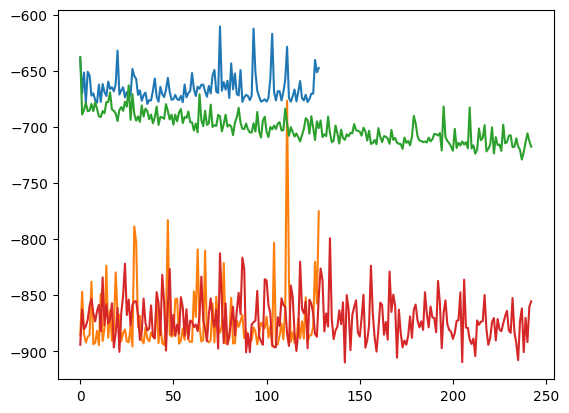

base save ckpt ckpt_basevi_pendulum_unweighted


In [11]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()

vi.save()


In [12]:
print(np.random.randn())
print(torch.randn(1))

0.7918527723830003
tensor([-0.5588])


In [13]:
# -1.363168449015435
# tensor([-0.5588])




In [14]:
vi.load()
# vi.update_mulogvar_offlinedata()

base load ckpt ckpt_basevi_pendulum_unweighted


0  c = 0.04836000413252169
1  c = 0.1364317765636198
2  c = 0.13130465958660892
3  c = 0.15636102143086553
4  c = 0.2561361494930644
5  c = 0.09827676831720462
6  c = 0.015978287309924843
7  c = 0.03419689942617847
8  c = 0.0737285143446466
9  c = 0.10929939808625587
10  c = 0.009354971715591387
11  c = 0.27849669421540213
12  c = 0.26142693073616824
13  c = 0.2315373757746974
14  c = 0.1733843931564372
15  c = 0.13241522759300817
16  c = 0.27495335103955004
17  c = 0.15866978855921512
18  c = 0.24054488241647975
19  c = 0.15198761317021361
20  c = 0.13481656866932185
21  c = 0.20331722460037713
22  c = 0.03189905604643314
23  c = 0.15697016542230283
24  c = 0.1774198708442328
25  c = 0.28426692878617804
26  c = 0.279988743954564
27  c = 0.09101515429649401
28  c = 0.01579703297742243
29  c = 0.212140343857636
30  c = 0.24179991497060743
31  c = 0.2835202900996078
32  c = 0.2150929003133702
33  c = 0.020647030599399683
34  c = 0.13211901608851162
35  c = 0.11162215605794568
36  c = 0.0

98  c = 0.23679805432405693
99  c = 0.21463189089693865
 
実環境方策rollout vs Sim環境方策rollout


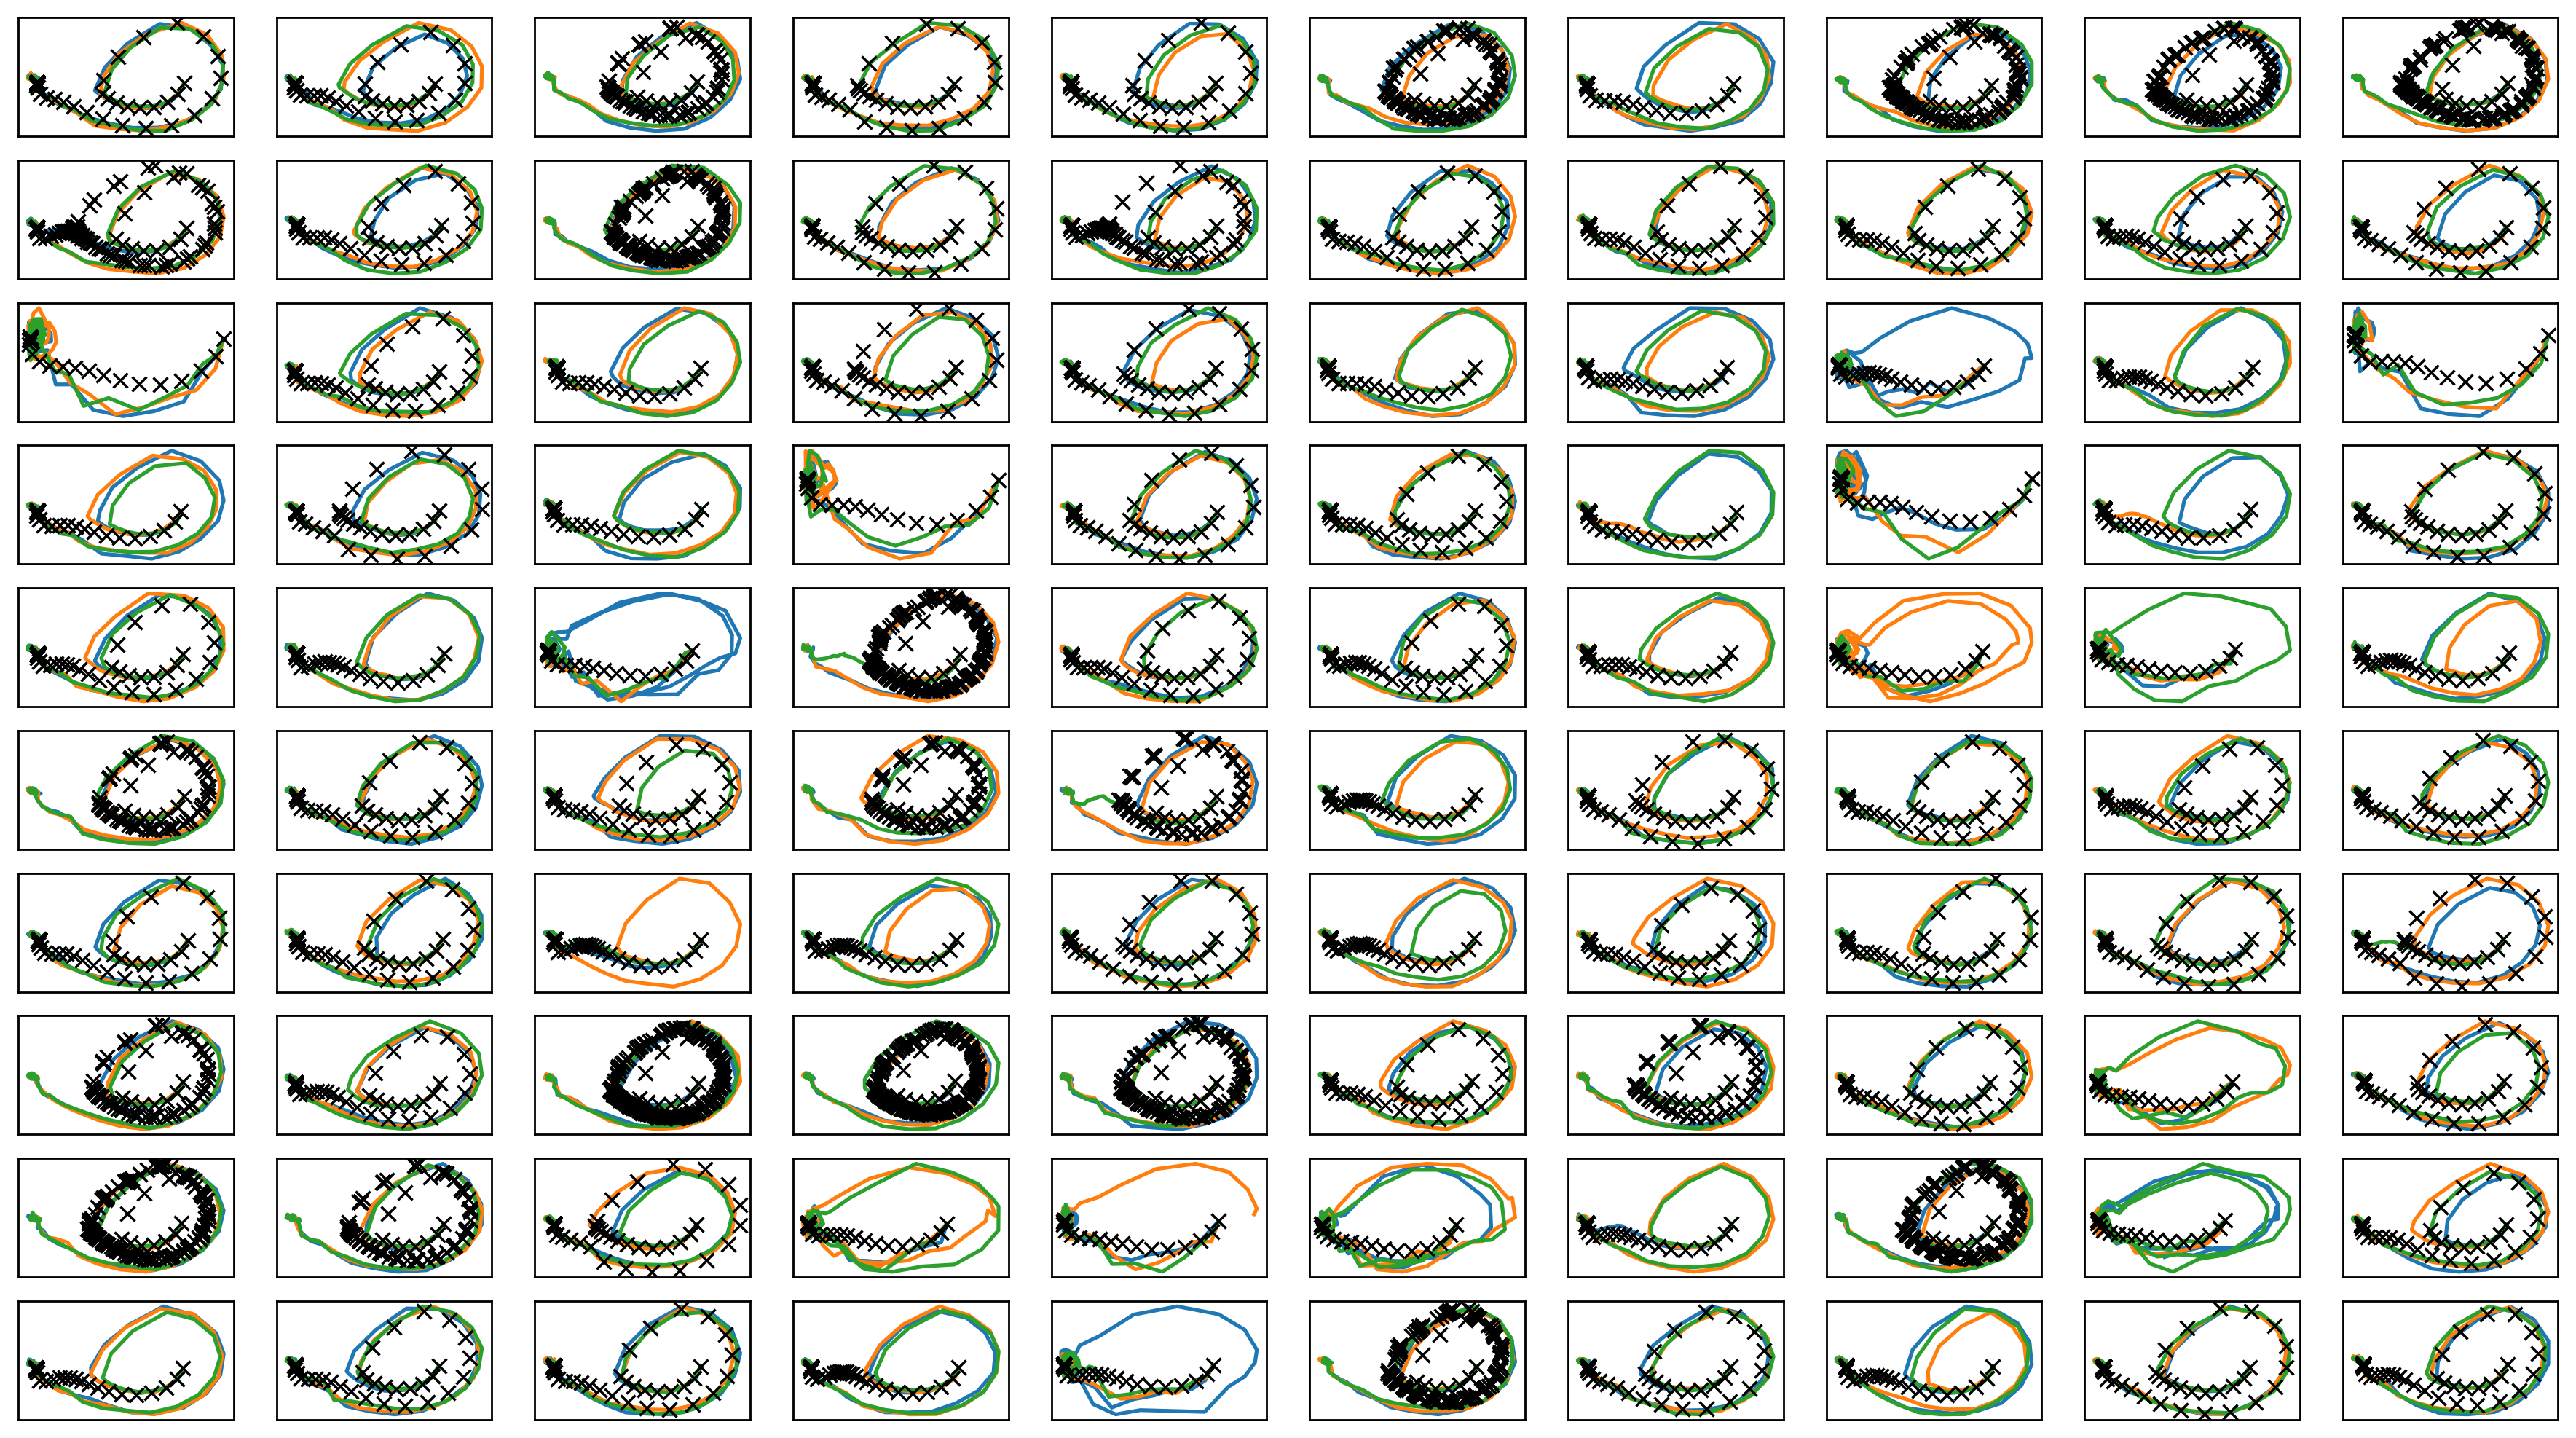

In [15]:
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

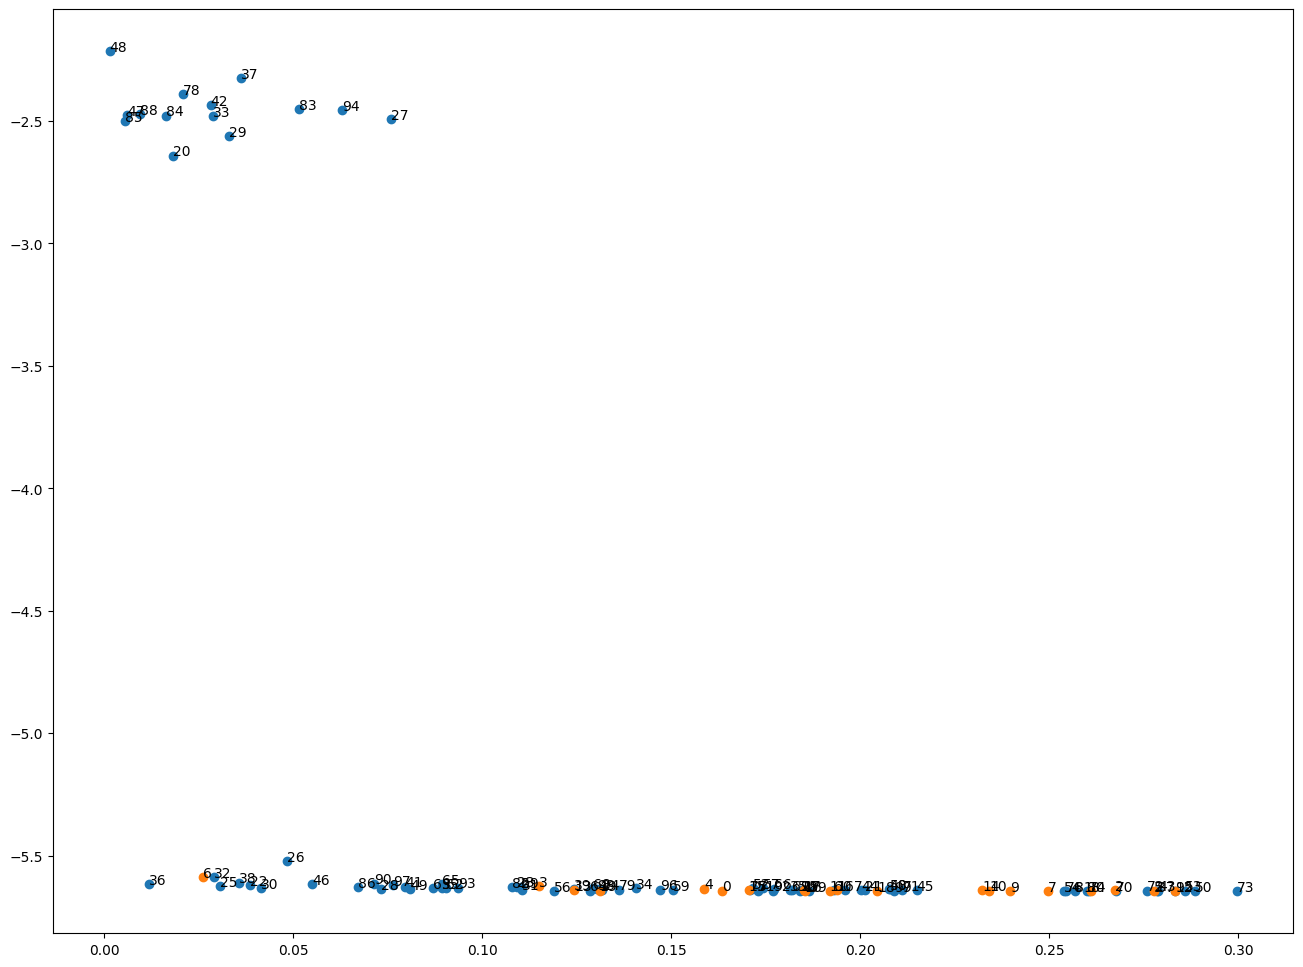

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [16]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


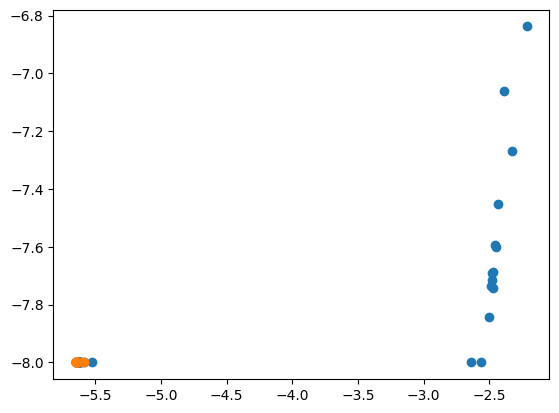

In [17]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [18]:
print(np.random.randn())
print(torch.randn(1))

-0.40669075065972066
tensor([0.7673])


In [19]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 13.88259  validloss 16.78341±0.00000  bestvalidloss 16.78341  last_update 0
train: iter 1  trainloss 12.68822  validloss 15.31036±0.00000  bestvalidloss 15.31036  last_update 0
train: iter 2  trainloss 11.64700  validloss 14.01579±0.00000  bestvalidloss 14.01579  last_update 0
train: iter 3  trainloss 10.74549  validloss 12.87012±0.00000  bestvalidloss 12.87012  last_update 0
train: iter 4  trainloss 9.95610  validloss 11.92666±0.00000  bestvalidloss 11.92666  last_update 0
train: iter 5  trainloss 9.26481  validloss 11.10567±0.00000  bestvalidloss 11.10567  last_update 0
train: iter 6  trainloss 8.65350  validloss 10.32407±0.00000  bestvalidloss 10.32407  last_update 0
train: iter 7  trainloss 8.10144  validloss 9.66034±0.00000  bestvalidloss 9.66034  last_update 0
train: iter 8  trainloss 7.61756  validloss 9.04536±0.00000  bestvalidloss 9.04536  last_update 0
train: iter 9  trainloss 7.19638  validloss 8.51890±0.00000  bestvalidloss 8.51890  last_update 0
tr

train: iter 85  trainloss 1.98544  validloss 2.01702±0.00000  bestvalidloss 2.01702  last_update 0
train: iter 86  trainloss 1.96951  validloss 1.99476±0.00000  bestvalidloss 1.99476  last_update 0
train: iter 87  trainloss 1.94966  validloss 1.96820±0.00000  bestvalidloss 1.96820  last_update 0
train: iter 88  trainloss 1.93184  validloss 1.94772±0.00000  bestvalidloss 1.94772  last_update 0
train: iter 89  trainloss 1.91248  validloss 1.91740±0.00000  bestvalidloss 1.91740  last_update 0
train: iter 90  trainloss 1.89410  validloss 1.89554±0.00000  bestvalidloss 1.89554  last_update 0
train: iter 91  trainloss 1.87622  validloss 1.86949±0.00000  bestvalidloss 1.86949  last_update 0
train: iter 92  trainloss 1.85791  validloss 1.84573±0.00000  bestvalidloss 1.84573  last_update 0
train: iter 93  trainloss 1.83825  validloss 1.81713±0.00000  bestvalidloss 1.81713  last_update 0
train: iter 94  trainloss 1.82147  validloss 1.79234±0.00000  bestvalidloss 1.79234  last_update 0
train: ite

train: iter 168  trainloss 1.60828  validloss 1.22074±0.00000  bestvalidloss 1.22074  last_update 0
train: iter 169  trainloss 1.60949  validloss 1.22468±0.00000  bestvalidloss 1.22074  last_update 1
train: iter 170  trainloss 1.61128  validloss 1.22109±0.00000  bestvalidloss 1.22074  last_update 2
train: iter 171  trainloss 1.60874  validloss 1.22205±0.00000  bestvalidloss 1.22074  last_update 3
train: iter 172  trainloss 1.61154  validloss 1.22054±0.00000  bestvalidloss 1.22054  last_update 0
train: iter 173  trainloss 1.61285  validloss 1.22034±0.00000  bestvalidloss 1.22034  last_update 0
train: iter 174  trainloss 1.60680  validloss 1.21883±0.00000  bestvalidloss 1.21883  last_update 0
train: iter 175  trainloss 1.60926  validloss 1.21883±0.00000  bestvalidloss 1.21883  last_update 1
train: iter 176  trainloss 1.61296  validloss 1.22178±0.00000  bestvalidloss 1.21883  last_update 2
train: iter 177  trainloss 1.61007  validloss 1.21803±0.00000  bestvalidloss 1.21803  last_update 0


train: iter 255  trainloss 1.60818  validloss 1.21629±0.00000  bestvalidloss 1.21256  last_update 27
train: iter 256  trainloss 1.60872  validloss 1.22020±0.00000  bestvalidloss 1.21256  last_update 28
train: iter 257  trainloss 1.60888  validloss 1.21553±0.00000  bestvalidloss 1.21256  last_update 29
train: iter 258  trainloss 1.60991  validloss 1.21567±0.00000  bestvalidloss 1.21256  last_update 30
train: iter 259  trainloss 1.60832  validloss 1.21604±0.00000  bestvalidloss 1.21256  last_update 31
train: iter 260  trainloss 1.60914  validloss 1.21721±0.00000  bestvalidloss 1.21256  last_update 32
train: iter 261  trainloss 1.60961  validloss 1.21452±0.00000  bestvalidloss 1.21256  last_update 33
train: iter 262  trainloss 1.61503  validloss 1.21936±0.00000  bestvalidloss 1.21256  last_update 34
train: iter 263  trainloss 1.60837  validloss 1.21695±0.00000  bestvalidloss 1.21256  last_update 35
train: iter 264  trainloss 1.60699  validloss 1.21680±0.00000  bestvalidloss 1.21256  last_

train: iter 342  trainloss 1.60714  validloss 1.21745±0.00000  bestvalidloss 1.21200  last_update 14
train: iter 343  trainloss 1.60855  validloss 1.21972±0.00000  bestvalidloss 1.21200  last_update 15
train: iter 344  trainloss 1.61194  validloss 1.21435±0.00000  bestvalidloss 1.21200  last_update 16
train: iter 345  trainloss 1.60825  validloss 1.22242±0.00000  bestvalidloss 1.21200  last_update 17
train: iter 346  trainloss 1.61056  validloss 1.21612±0.00000  bestvalidloss 1.21200  last_update 18
train: iter 347  trainloss 1.61068  validloss 1.21435±0.00000  bestvalidloss 1.21200  last_update 19
train: iter 348  trainloss 1.61068  validloss 1.21680±0.00000  bestvalidloss 1.21200  last_update 20
train: iter 349  trainloss 1.60744  validloss 1.21412±0.00000  bestvalidloss 1.21200  last_update 21
train: iter 350  trainloss 1.60845  validloss 1.21686±0.00000  bestvalidloss 1.21200  last_update 22
train: iter 351  trainloss 1.61139  validloss 1.21799±0.00000  bestvalidloss 1.21200  last_

train: iter 434  trainloss 1.61287  validloss 1.21523±0.00000  bestvalidloss 1.21185  last_update 33
train: iter 435  trainloss 1.61118  validloss 1.21993±0.00000  bestvalidloss 1.21185  last_update 34
train: iter 436  trainloss 1.60799  validloss 1.21817±0.00000  bestvalidloss 1.21185  last_update 35
train: iter 437  trainloss 1.61055  validloss 1.22039±0.00000  bestvalidloss 1.21185  last_update 36
train: iter 438  trainloss 1.60757  validloss 1.21784±0.00000  bestvalidloss 1.21185  last_update 37
train: iter 439  trainloss 1.60878  validloss 1.21800±0.00000  bestvalidloss 1.21185  last_update 38
train: iter 440  trainloss 1.61053  validloss 1.21901±0.00000  bestvalidloss 1.21185  last_update 39
train: iter 441  trainloss 1.61173  validloss 1.21584±0.00000  bestvalidloss 1.21185  last_update 40
train: iter 442  trainloss 1.60877  validloss 1.21668±0.00000  bestvalidloss 1.21185  last_update 41
train: iter 443  trainloss 1.60799  validloss 1.21922±0.00000  bestvalidloss 1.21185  last_

train: iter 521  trainloss 1.60952  validloss 1.21860±0.00000  bestvalidloss 1.20955  last_update 39
train: iter 522  trainloss 1.60785  validloss 1.21855±0.00000  bestvalidloss 1.20955  last_update 40
train: iter 523  trainloss 1.61124  validloss 1.21627±0.00000  bestvalidloss 1.20955  last_update 41
train: iter 524  trainloss 1.60817  validloss 1.21939±0.00000  bestvalidloss 1.20955  last_update 42
train: iter 525  trainloss 1.60734  validloss 1.21560±0.00000  bestvalidloss 1.20955  last_update 43
train: iter 526  trainloss 1.61222  validloss 1.21523±0.00000  bestvalidloss 1.20955  last_update 44
train: iter 527  trainloss 1.60905  validloss 1.21361±0.00000  bestvalidloss 1.20955  last_update 45
train: iter 528  trainloss 1.61267  validloss 1.21502±0.00000  bestvalidloss 1.20955  last_update 46
train: iter 529  trainloss 1.60842  validloss 1.21863±0.00000  bestvalidloss 1.20955  last_update 47
train: iter 530  trainloss 1.60848  validloss 1.21338±0.00000  bestvalidloss 1.20955  last_

In [20]:
print(vi.initial_belief)
vi.save()

Parameter containing:
tensor([-5.0781,  0.3780], requires_grad=True)
base save ckpt ckpt_basevi_pendulum_unweighted


In [21]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)

train: iter 0  trainloss 13.66844  validloss 22.83163±0.00000  bestvalidloss 22.83163  last_update 0
train: iter 1  trainloss 7.41827  validloss 12.28381±0.00000  bestvalidloss 12.28381  last_update 0
train: iter 2  trainloss 4.85084  validloss 6.35858±0.00000  bestvalidloss 6.35858  last_update 0
train: iter 3  trainloss 3.95232  validloss 3.75875±0.00000  bestvalidloss 3.75875  last_update 0
train: iter 4  trainloss 3.59537  validloss 2.93960±0.00000  bestvalidloss 2.93960  last_update 0
train: iter 5  trainloss 3.24778  validloss 2.35363±0.00000  bestvalidloss 2.35363  last_update 0
train: iter 6  trainloss 2.97336  validloss 1.99614±0.00000  bestvalidloss 1.99614  last_update 0
train: iter 7  trainloss 2.76911  validloss 1.79815±0.00000  bestvalidloss 1.79815  last_update 0
train: iter 8  trainloss 2.62582  validloss 1.68371±0.00000  bestvalidloss 1.68371  last_update 0
train: iter 9  trainloss 2.44489  validloss 1.48971±0.00000  bestvalidloss 1.48971  last_update 0
train: iter 10 

train: iter 84  trainloss 1.78791  validloss 1.04789±0.00000  bestvalidloss 1.02824  last_update 5
train: iter 85  trainloss 1.77283  validloss 1.06476±0.00000  bestvalidloss 1.02824  last_update 6
train: iter 86  trainloss 1.72699  validloss 1.01786±0.00000  bestvalidloss 1.01786  last_update 0
train: iter 87  trainloss 1.80118  validloss 1.07324±0.00000  bestvalidloss 1.01786  last_update 1
train: iter 88  trainloss 1.77711  validloss 1.10680±0.00000  bestvalidloss 1.01786  last_update 2
train: iter 89  trainloss 1.80473  validloss 1.01161±0.00000  bestvalidloss 1.01161  last_update 0
train: iter 90  trainloss 1.81562  validloss 1.01794±0.00000  bestvalidloss 1.01161  last_update 1
train: iter 91  trainloss 1.68982  validloss 1.05755±0.00000  bestvalidloss 1.01161  last_update 2
train: iter 92  trainloss 1.73046  validloss 1.03694±0.00000  bestvalidloss 1.01161  last_update 3
train: iter 93  trainloss 1.80291  validloss 1.03776±0.00000  bestvalidloss 1.01161  last_update 4
train: ite

train: iter 168  trainloss 1.79834  validloss 1.05669±0.00000  bestvalidloss 0.99767  last_update 43
train: iter 169  trainloss 1.74416  validloss 1.01120±0.00000  bestvalidloss 0.99767  last_update 44
train: iter 170  trainloss 1.77142  validloss 1.04411±0.00000  bestvalidloss 0.99767  last_update 45
train: iter 171  trainloss 1.74780  validloss 1.05480±0.00000  bestvalidloss 0.99767  last_update 46
train: iter 172  trainloss 1.75722  validloss 1.06596±0.00000  bestvalidloss 0.99767  last_update 47
train: iter 173  trainloss 1.82350  validloss 1.01891±0.00000  bestvalidloss 0.99767  last_update 48
train: iter 174  trainloss 1.70726  validloss 1.02983±0.00000  bestvalidloss 0.99767  last_update 49
train: iter 175  trainloss 1.78976  validloss 1.09854±0.00000  bestvalidloss 0.99767  last_update 50
train: iter 176  trainloss 1.73603  validloss 1.02918±0.00000  bestvalidloss 0.99767  last_update 51
train: iter 177  trainloss 1.77209  validloss 1.10449±0.00000  bestvalidloss 0.99767  last_

train: iter 252  trainloss 1.71118  validloss 1.05739±0.00000  bestvalidloss 0.98213  last_update 46
train: iter 253  trainloss 1.77278  validloss 1.08466±0.00000  bestvalidloss 0.98213  last_update 47
train: iter 254  trainloss 1.72731  validloss 1.09903±0.00000  bestvalidloss 0.98213  last_update 48
train: iter 255  trainloss 1.76540  validloss 1.07379±0.00000  bestvalidloss 0.98213  last_update 49
train: iter 256  trainloss 1.74623  validloss 1.00925±0.00000  bestvalidloss 0.98213  last_update 50
train: iter 257  trainloss 1.76895  validloss 1.02497±0.00000  bestvalidloss 0.98213  last_update 51
train: iter 258  trainloss 1.74510  validloss 0.99897±0.00000  bestvalidloss 0.98213  last_update 52
train: iter 259  trainloss 1.77745  validloss 1.03559±0.00000  bestvalidloss 0.98213  last_update 53
train: iter 260  trainloss 1.77471  validloss 1.07870±0.00000  bestvalidloss 0.98213  last_update 54
train: iter 261  trainloss 1.76676  validloss 1.00487±0.00000  bestvalidloss 0.98213  last_

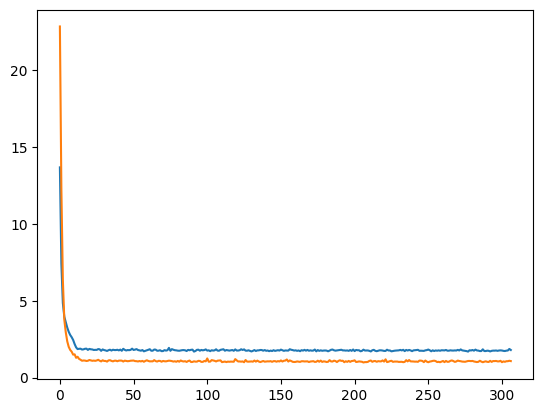

In [22]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

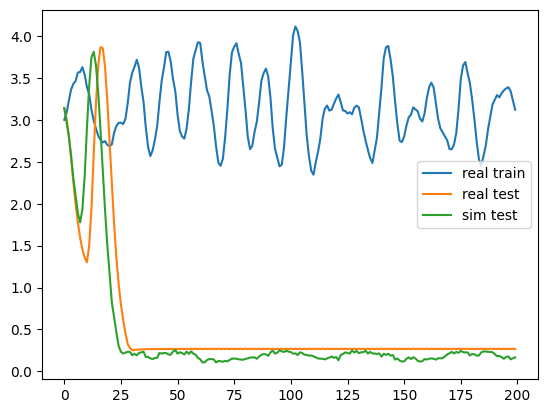

encoder [-5.642956 -8.      ]
initial_belief tensor([-5.0781,  0.3780])
real train tensor([-5.6355, -8.0145])
real test tensor([-2.4628, -7.7419])
sim tensor([-5.6545, -7.9829])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-5.0


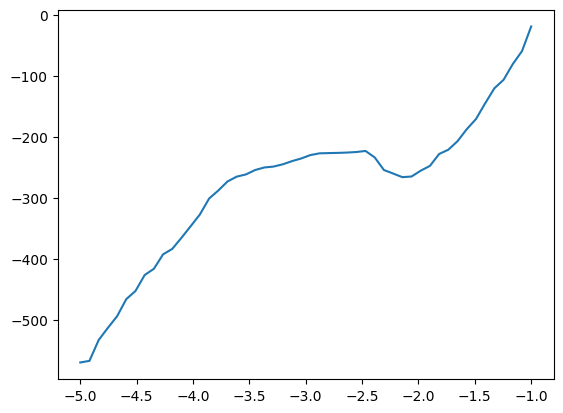

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])